In [204]:
import pandas as pd

# Prétraitement des Avis de Produits
Les données utilisées proviennent du dataset Amazon Review Dataset 2023, spécifiquement du
subset Cell_Phones_and_Accessories. Les données à votre disposition comprennent uniquement les
1000 premiers avis clients de ce subset. Le dataset complet est disponible sur le site officiel : https://amazon-reviews-2023.github.io/.
Dans ce travail pratique, vous allez installer et configurer un outil de traitement du langage naturel pour analyser des textes en anglais (par exemple, SpaCy, NLTK). Chargez un modèle de langue anglaise (par exemple, https://spacy.io/models/en) adapté pour des tâches comme la lemmatisation et la suppression des stop words.

## Import des données
Choisissez les champs pertinents des avis, comme title et text, pour créer une liste de
documents qui servira de base au traitement.

In [205]:
df_meta = pd.read_json('data/meta.jsonl', lines=True)
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Cell Phones & Accessories,ARAREE Slim Diary Cell Phone Case for Samsung ...,3.8,5,"[Genuine Cow leather with 6 different colors, ...","[JUST LOOK, You can tell the difference. Make ...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],araree,"[Cell Phones & Accessories, Cases, Holsters & ...",{'Product Dimensions': '3.35 x 0.59 x 6.18 inc...,B013SK1JTY,NaN,NaN,NaN
1,Cell Phones & Accessories,Bastmei for OnePlus 7T Case Extremely Light Ul...,4.4,177,[Ultra-thin & Ultra-light: The ultra slim fit ...,[],11.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Bastmei,"[Cell Phones & Accessories, Cases, Holsters & ...",{'Package Dimensions': '7.6 x 4.29 x 0.75 inch...,B07ZPSG8P5,NaN,NaN,NaN
2,Cell Phones & Accessories,Wireless Fones Branded New Iphone 5C/LITE Hot ...,4.0,2,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],WIRELESS FONES,"[Cell Phones & Accessories, iPhone Accessories]","{'Item model number': 'Apple Iphone 5C', 'Othe...",B00GKR3L12,NaN,NaN,NaN
3,Cell Phones & Accessories,"iPhone 6 Plus + Case, DandyCase Perfect PATTER...",4.0,15,"[Slim-Fit design for the iPhone 6 Plus (5.5"" s...",[Case does not need to be removed for charging...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],DandyCase,"[Cell Phones & Accessories, iPhone Accessories]",{'Product Dimensions': '5.43 x 0.28 x 2.64 inc...,B00PB8U8BW,NaN,NaN,NaN
4,Cell Phones & Accessories,"Case for Galaxy S6/S6 Edge, Thin Translucent V...",4.0,1,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],7Pite,"[Cell Phones & Accessories, Cases, Holsters & ...",{'Package Dimensions': '8.31 x 3.74 x 0.55 inc...,B07D3RHSRV,NaN,NaN,NaN


In [206]:
df_meta_prep = df_meta[['title', 'average_rating']].head()
df_meta_prep.head()

,title,average_rating
0,ARAREE Slim Diary Cell Phone Case for Samsung ...,3.8
1,Bastmei for OnePlus 7T Case Extremely Light Ul...,4.4
2,Wireless Fones Branded New Iphone 5C/LITE Hot ...,4.0
3,"iPhone 6 Plus + Case, DandyCase Perfect PATTER...",4.0
4,"Case for Galaxy S6/S6 Edge, Thin Translucent V...",4.0


In [207]:
df_reviews = pd.read_json('data/reviews.jsonl', lines=True)
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,No white background! It’s clear!,I bought this bc I thought it had the nice whi...,[{'small_image_url': 'https://images-na.ssl-im...,B08L6L3X1S,B08L6L3X1S,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2021-01-30 22:07:31.196,0,True
1,5,Awesome! Great price! Works well!,Perfect. How pissed am I that I recently paid ...,[],B079BPGF6C,B079BPGF6C,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-08-16 18:18:37.349,2,True
2,5,Worked but took an hour to install,Overall very happy with the end result. If you...,[{'small_image_url': 'https://m.media-amazon.c...,B088DR7Z5B,B0BBGGC8F2,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2021-08-17 21:21:44.798,3,True
3,4,Decent,Lasted about 9 months then the lock button bro...,[{'small_image_url': 'https://images-na.ssl-im...,B07XRDHDNQ,B07XRDHDNQ,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-05-26 05:14:42.910,0,True
4,5,LOVE IT!,LOVE THIS CASE! Works better than my expensive...,[],B00A8ZDL9Y,B00A8ZDL9Y,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2014-08-25 19:23:08.000,0,True


In [208]:
df_reviews_prep = df_reviews[['title', 'text']]
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,I bought this bc I thought it had the nice whi...
1,Awesome! Great price! Works well!,Perfect. How pissed am I that I recently paid ...
2,Worked but took an hour to install,Overall very happy with the end result. If you...
3,Decent,Lasted about 9 months then the lock button bro...
4,LOVE IT!,LOVE THIS CASE! Works better than my expensive...


## Traitement linguistique
### Tokenisation
Découpez les textes en mots (tokens).


In [209]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chloegerardin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chloegerardin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chloegerardin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [210]:
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(nltk.word_tokenize)
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[I, bought, this, bc, I, thought, it, had, the..."
1,Awesome! Great price! Works well!,"[Perfect, ., How, pissed, am, I, that, I, rece..."
2,Worked but took an hour to install,"[Overall, very, happy, with, the, end, result,..."
3,Decent,"[Lasted, about, 9, months, then, the, lock, bu..."
4,LOVE IT!,"[LOVE, THIS, CASE, !, Works, better, than, my,..."


### Lemmatisation
Extrayez les lemmes (formes de base des mots) pour chaque texte.


In [211]:
lemmatizer = nltk.WordNetLemmatizer()           
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[I, bought, this, bc, I, thought, it, had, the..."
1,Awesome! Great price! Works well!,"[Perfect, ., How, pissed, am, I, that, I, rece..."
2,Worked but took an hour to install,"[Overall, very, happy, with, the, end, result,..."
3,Decent,"[Lasted, about, 9, month, then, the, lock, but..."
4,LOVE IT!,"[LOVE, THIS, CASE, !, Works, better, than, my,..."


## Suppression des stop words
Éliminez les stop words (mots fonctionnels sans pertinence contextuelle).

In [212]:
# nltk.download('stopwords')
# nltk.download('punkt')

# stop_words = set(nltk.corpus.stopwords.words('english'))
# df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
# 
# df_reviews_prep.head()
# print(stop_words)

In [213]:
#stopwords avec spacy
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[bought, bc, thought, nice, white, background,..."
1,Awesome! Great price! Works well!,"[Perfect, ., pissed, recently, paid, $, 20, 1,..."
2,Worked but took an hour to install,"[Overall, happy, end, result, ., hate, puzzle,..."
3,Decent,"[Lasted, 9, month, lock, button, broke, ., Dec..."
4,LOVE IT!,"[LOVE, CASE, !, Works, better, expensive, $, 3..."


### Exclusion des éléments non pertinents
- Ignorez les signes de ponctuation.
- Identifiez et supprimez les termes qui n’ajoutent pas de valeur (e.g., 123, www).

In [214]:
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if word.isalnum()])
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[bought, bc, thought, nice, white, background,..."
1,Awesome! Great price! Works well!,"[Perfect, pissed, recently, paid, 20, 1, Fitbi..."
2,Worked but took an hour to install,"[Overall, happy, end, result, hate, puzzle, do..."
3,Decent,"[Lasted, 9, month, lock, button, broke, Decent..."
4,LOVE IT!,"[LOVE, CASE, Works, better, expensive, 35, cas..."


### Inspection des données
Examinez les données pour identifier d’autres éléments inutiles ou bruités qui
pourraient être exclus

In [215]:
df_reviews_prep.head(20)

df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if len(word) > 3])
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word.lower() for word in x])
df_reviews_prep.head(20)

,title,text
0,No white background! It’s clear!,"[bought, thought, nice, white, background, tur..."
1,Awesome! Great price! Works well!,"[perfect, pissed, recently, paid, fitbit, cabl..."
2,Worked but took an hour to install,"[overall, happy, result, hate, puzzle, love, p..."
3,Decent,"[lasted, month, lock, button, broke, decent, p..."
4,LOVE IT!,"[love, case, works, better, expensive, case]"
5,Works Great with my IPhone 13 & Magna Case!,"[item, work, great, iphone, magna, case, charg..."
6,Great item! Easy to install!,"[item, came, described, fast, shipping, east, ..."
7,Four Stars,"[stocking, stuffer, liked]"
8,It is a great value & protects the phone from ...,"[love, camo, case, great, value, protects, pho..."
9,Good to have these around!,"[work, little, difficult, yellow, sticky, grea..."


### Sauvegarde des données préparées
Pour chaque avis, créez une liste de tokens filtrés (lemmes sans stop words ni bruit).
Sauvegardez les listes résultantes dans un fichier JSON.

In [216]:
df_reviews_prep.to_json('data/reviews_prep.jsonl', lines=True, orient='records')

# Clustering non supervisé des documents pour identifier des topics et mots-clés
Chargez le fichier JSON contenant des tokens pré-traités. Les données doivent être une liste de
documents, chaque document correspondant à un avis déjà nettoyé et prêt pour l’analyse.

In [217]:
df_reviews_json = pd.read_json('data/reviews_prep.jsonl', lines=True)
df_reviews_json.head()

,title,text
0,No white background! It’s clear!,"[bought, thought, nice, white, background, tur..."
1,Awesome! Great price! Works well!,"[perfect, pissed, recently, paid, fitbit, cabl..."
2,Worked but took an hour to install,"[overall, happy, result, hate, puzzle, love, p..."
3,Decent,"[lasted, month, lock, button, broke, decent, p..."
4,LOVE IT!,"[love, case, works, better, expensive, case]"


## Génération des embeddings
Utilisez un modèle pré-entraîné pour représenter les documents sous forme vectorielle,
comme all-MiniLM-L6-v2 via SentenceTransformers (autres: all-MiniLM-L12-v2,
bert-base-uncased).
Alternative: Employez TfidfVectorizer pour obtenir une matrice sparse représentant les
documents.

In [218]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
texts = [" ".join(doc["text"]) for doc in df_reviews_json.to_dict(orient='records')]
embeddings = model.encode(texts)
print(embeddings)

[[-0.07672836  0.04197766  0.1054896  ...  0.00524029 -0.00697331
   0.08239663]
 [-0.07957576  0.04584372  0.04604864 ... -0.05493836 -0.01422952
  -0.00734   ]
 [-0.08224726  0.05883975  0.0741358  ...  0.07710269  0.0892501
   0.02077752]
 ...
 [-0.04820053  0.03886178  0.01730544 ... -0.00571157  0.05310586
   0.1295096 ]
 [-0.0531419  -0.00520505  0.08476841 ...  0.04593628  0.06824432
   0.07733921]
 [-0.1207194   0.10473534  0.06735586 ...  0.01302312  0.10522582
   0.05340402]]


## Clustering
Appliquez l’algorithme KMeans pour regrouper les documents en un nombre défini de
clusters (num_clusters).
Alternative : Utilisez DBSCAN si les données sont inégalement réparties ou si le nombre de
clusters n’est pas connu à l’avance.


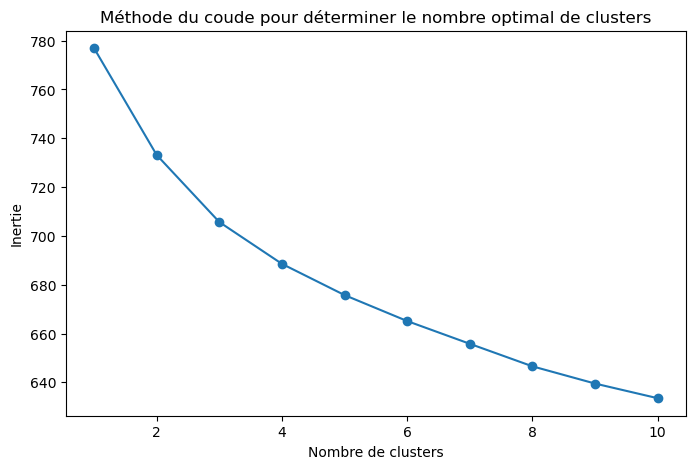

In [219]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

embeddings = np.array(embeddings)

# Liste pour stocker les inerties
inertias = []

# Tester différents nombres de clusters
cluster_range = range(1, 11)
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [220]:
from sklearn.cluster import KMeans
import numpy as np

embeddings = np.array(embeddings)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(embeddings)

for i, label in enumerate(kmeans.labels_):
    print(f"Document {i} appartient au cluster {label}")

Document 0 appartient au cluster 1
Document 1 appartient au cluster 2
Document 2 appartient au cluster 1
Document 3 appartient au cluster 1
Document 4 appartient au cluster 1
Document 5 appartient au cluster 0
Document 6 appartient au cluster 2
Document 7 appartient au cluster 2
Document 8 appartient au cluster 1
Document 9 appartient au cluster 2
Document 10 appartient au cluster 0
Document 11 appartient au cluster 1
Document 12 appartient au cluster 2
Document 13 appartient au cluster 2
Document 14 appartient au cluster 0
Document 15 appartient au cluster 1
Document 16 appartient au cluster 2
Document 17 appartient au cluster 1
Document 18 appartient au cluster 2
Document 19 appartient au cluster 1
Document 20 appartient au cluster 1
Document 21 appartient au cluster 2
Document 22 appartient au cluster 2
Document 23 appartient au cluster 0
Document 24 appartient au cluster 2
Document 25 appartient au cluster 2
Document 26 appartient au cluster 1
Document 27 appartient au cluster 2
Do

In [221]:
from sklearn.metrics import silhouette_score
silhouette_score(embeddings, kmeans.labels_)

0.062666185

### Analyse des clusters
#### Association des documents aux clusters : 
Pour chaque cluster identifié, regroupez les documents correspondants.

In [222]:
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)
print(clusters)

{1: [0, 2, 3, 4, 8, 11, 15, 17, 19, 20, 26, 43, 50, 53, 54, 55, 57, 59, 62, 68, 70, 71, 72, 75, 77, 79, 80, 82, 90, 91, 93, 94, 96, 97, 98, 104, 105, 106, 107, 108, 109, 110, 113, 114, 119, 122, 124, 127, 128, 137, 138, 140, 141, 142, 146, 152, 153, 157, 159, 160, 163, 166, 168, 171, 176, 177, 179, 181, 183, 184, 185, 186, 188, 193, 194, 196, 198, 199, 202, 203, 206, 215, 218, 221, 223, 224, 226, 227, 228, 230, 231, 234, 245, 247, 248, 250, 257, 262, 264, 266, 267, 268, 270, 274, 277, 278, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 292, 293, 294, 295, 298, 301, 303, 305, 309, 314, 315, 317, 320, 321, 323, 325, 326, 328, 329, 331, 332, 333, 334, 335, 339, 342, 344, 351, 354, 355, 357, 358, 364, 367, 368, 371, 372, 373, 377, 384, 385, 386, 388, 389, 390, 391, 394, 395, 400, 405, 407, 411, 412, 413, 414, 415, 419, 421, 422, 424, 425, 426, 427, 428, 435, 436, 438, 440, 444, 445, 450, 451, 453, 455, 457, 458, 459, 461, 467, 468, 470, 473, 477, 478, 479, 480, 481, 482, 483, 484, 485, 

#### Fréquences des mots
- Calculez les fréquences des mots dans chaque cluster.
- Identifiez les 10 mots les plus fréquents pour chaque cluster.

In [223]:
from collections import Counter

clusters = kmeans.labels_

texts = [" ".join(doc["text"]) for doc in df_reviews_json.to_dict(orient='records')]

df = pd.DataFrame({'text': texts, 'cluster': clusters})

word_freq_per_cluster = {}

for cluster in range(num_clusters):
    cluster_text = " ".join(df[df['cluster'] == cluster]['text'].tolist())
    word_freq = Counter(cluster_text.split())
    word_freq_per_cluster[cluster] = word_freq

for cluster, word_freq in word_freq_per_cluster.items():
    print(f"Cluster {cluster}:")
    for word, freq in word_freq.most_common(10):
        print(f"{word}: {freq}")

Cluster 0:
charge: 101
phone: 101
charger: 90
work: 77
cable: 65
charging: 60
time: 58
like: 43
good: 41
great: 40
Cluster 1:
phone: 660
case: 569
screen: 173
like: 134
great: 133
good: 113
protector: 99
iphone: 96
cover: 96
love: 95
Cluster 2:
great: 85
band: 54
love: 52
like: 52
easy: 44
work: 43
good: 40
product: 32
nice: 32
watch: 31


#### Vérification de pertinence
Analysez si ces mots fréquents sont représentatifs du thème ou du sujet du cluster.